In [1]:
import nltk
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

Q2

In [11]:
fileid ='austen-persuasion.txt'
persuasion = gutenberg.words(fileid)
print len(persuasion)
print len(set(persuasion))

98171
6132


Q3 布朗语料库 

In [13]:
from nltk.corpus import brown
print brown.categories(),

[u'adventure', u'belles_lettres', u'editorial', u'fiction', u'government', u'hobbies', u'humor', u'learned', u'lore', u'mystery', u'news', u'religion', u'reviews', u'romance', u'science_fiction']


In [15]:
brown.words(categories="romance")

[u'They', u'neither', u'liked', u'nor', u'disliked', ...]

Q4 

In [16]:
from nltk.corpus import state_union

In [19]:
print state_union.fileids()[:2]

[u'1945-Truman.txt', u'1946-Truman.txt']


In [25]:
cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for target in ['men', 'women', 'people']
        for fileid in state_union.fileids()
        for w in state_union.words(fileid)
        if w.lower() == target)

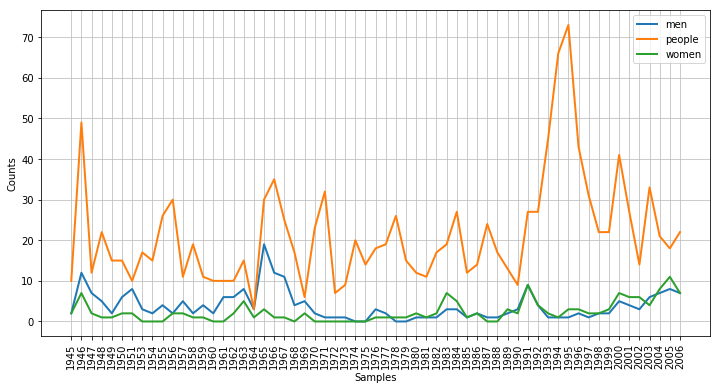

In [30]:
plt.figure(figsize=(12, 6))
cfd.plot()

Q5 名词的整体部分关系

In [46]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [52]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [43]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [50]:
wn.synset('canis.n.01').member_meronyms()

[Synset('dog.n.01'), Synset('jackal.n.01'), Synset('wolf.n.01')]

Q6 比较词表-翻译器

In [54]:
from nltk.corpus import swadesh
print swadesh.fileids()

[u'be', u'bg', u'bs', u'ca', u'cs', u'cu', u'de', u'en', u'es', u'fr', u'hr', u'it', u'la', u'mk', u'nl', u'pl', u'pt', u'ro', u'ru', u'sk', u'sl', u'sr', u'sw', u'uk']


In [55]:
it2en = swadesh.entries(['it', 'en'])
de2en = swadesh.entries(['de', 'en'])
translate = dict(it2en)
translate.update(dict(de2en))
translate['Hund']

u'dog'

In [56]:
# Bug
#(u'asciutto, secco', u'dry')
translate['secco']

KeyError: 'secco'

In [58]:
#检测到有多对多关系时，在entries中添加多组1对N
for it, en in it2en:
    if ',' in it:
        words = it.split(', ')
        for eachWord in words:
            newWord = (eachWord, en)
            it2en.append(newWord)

for de, en in it2en:
    if ',' in de:
        words = de.split(', ')
        for eachWord in words:
            newWord = (eachWord, en)
            de2en.append(newWord)

translate = dict(it2en)
translate.update(dict(de2en))

In [59]:
translate['secco']

u'dry'

Q8 名字语料库

In [60]:
names = nltk.corpus.names
names.fileids()

[u'female.txt', u'male.txt']

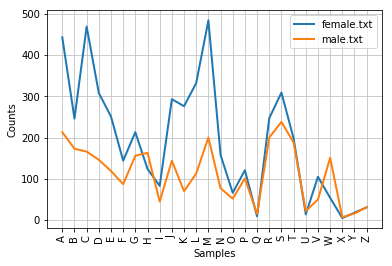

In [61]:
cfd = nltk.ConditionalFreqDist(
        (fileid, name[0])
        for fileid in names.fileids()
        for name in names.words(fileid))
cfd.plot()

Q11

In [2]:
from nltk.corpus import brown

cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))

In [12]:
word = ['is', 'was', 'are', 'were', 'will']
genres = ['news', 'science_fiction']
cfd.tabulate(conditions=genres, samples=word)

                  is  was  are were will 
           news  732  717  328  252  389 
science_fiction   47  198   23   59   16 


Q12 CMU发音词典

In [2]:
from nltk.corpus import cmudict
# http://www.nltk.org/howto/corpus.html

In [18]:
pron_dict = nltk.corpus.cmudict.dict()
len(set(pron_dict)) 

123455

In [30]:
prondict['clotted']

[[u'K', u'L', u'AA1', u'T', u'AH0', u'D'],
 [u'K', u'L', u'AA1', u'T', u'IH0', u'D']]

In [31]:
len([w for w in pron_dict if len(prondict[w])>1])*1.0/len(set(pron_dict)) 

0.07485318537118789

Q13 没有下位词的名词在同义词集中占的比例

In [30]:
from nltk.corpus import wordnet as wn
non_hypon=[w for w in set(wn.all_synsets('n')) if w.hyponyms()==[]]
len(non_hypon)*1./len(list(wn.all_synsets('n')))

0.7967119283931072

In [10]:
non_hypon = filter(lambda ss: len(ss.hyponyms()) <= 0, wn.all_synsets('n'))

Q14 同义词集 词定义

In [43]:
def supergloss(s):
    print "%s: %s" % (s.lemma_names(), s.definition())
    if len(s.hypernyms()) > 0:
        print "Hypernyms:"
        for hyper in s.hypernyms():
            print "\t%s: %s" % (hyper.lemma_names(), hyper.definition())
    if len(s.hyponyms()) > 0:
        print "Hyponyms:"
        for hypon in s.hyponyms():
            print "\t%s: %s" % (hypon.lemma_names(), hypon.definition())

syn = 'car.n.01'
supergloss(wn.synset(syn))

[u'car', u'auto', u'automobile', u'machine', u'motorcar']: a motor vehicle with four wheels; usually propelled by an internal combustion engine
Hypernyms:
	[u'motor_vehicle', u'automotive_vehicle']: a self-propelled wheeled vehicle that does not run on rails
Hyponyms:
	[u'ambulance']: a vehicle that takes people to and from hospitals
	[u'beach_wagon', u'station_wagon', u'wagon', u'estate_car', u'beach_waggon', u'station_waggon', u'waggon']: a car that has a long body and rear door with space behind rear seat
	[u'bus', u'jalopy', u'heap']: a car that is old and unreliable
	[u'cab', u'hack', u'taxi', u'taxicab']: a car driven by a person whose job is to take passengers where they want to go in exchange for money
	[u'compact', u'compact_car']: a small and economical car
	[u'convertible']: a car that has top that can be folded or removed
	[u'coupe']: a car with two doors and front seats and a luggage compartment
	[u'cruiser', u'police_cruiser', u'patrol_car', u'police_car', u'prowl_car', u